<a href="https://colab.research.google.com/github/plaban1981/Vision_Transformer_Model/blob/main/Transformers_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 304 kB 31.3 MB/s 
     |████████████████████████████████| 163 kB 26.3 MB/s 


In [2]:
! pip install diffusers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 34.7 MB/s 


In [3]:
! pip install torch==1.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████  | 834.1 MB 1.2 MB/s eta 0:00:49tcmalloc: large alloc 1147494400 bytes == 0x6630e000 @  0x7fc07d25e615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 7.0 kB/s 
     |████████████████████████████████| 317.1 MB 33 kB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 849 kB 61.8 MB/s 
     |████████████████████████████████| 557.1 MB 12 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
ERROR: pip's dependency resolve

In [4]:
! pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 36.0 MB/s 
     |████████████████████████████████| 7.6 MB 56.9 MB/s 


In [6]:
! pip install scipy ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.7 MB/s 


In [1]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline,
)

img2text = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
img2img = StableDiffusionImg2ImgPipeline(**img2text.components)
inpaint = StableDiffusionInpaintPipeline(**img2text.components)

# now you can use img2text(...), img2img(...), inpaint(...) just like the call methods of each respective pipeline

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [4]:
pipe = img2text.to("cuda")

  0%|          | 0/51 [00:00<?, ?it/s]

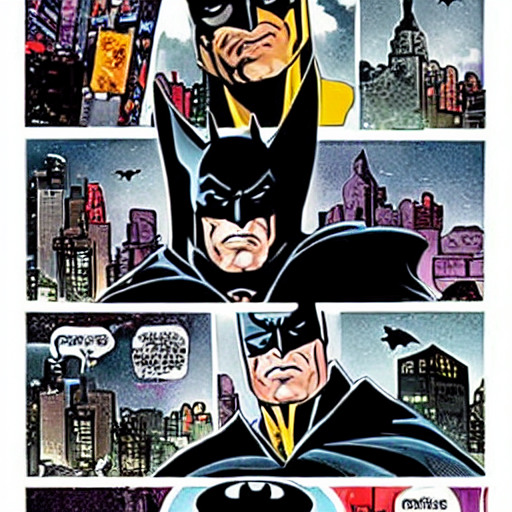

In [ ]:
prompt = "batman series"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
image.save(f"astronaut_rides_horse.png")

# or if you're in a google colab you can directly display it with 
image

  0%|          | 0/16 [00:00<?, ?it/s]

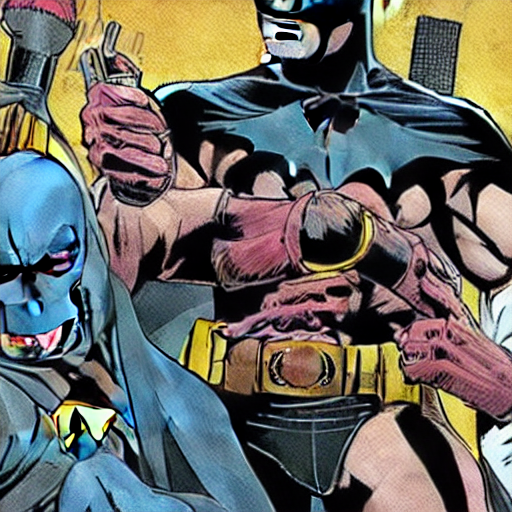

In [ ]:
import torch

generator = torch.Generator("cuda").manual_seed(1024)

image = pipe(prompt, num_inference_steps=15, generator=generator).images[0]

image

  0%|          | 0/51 [00:00<?, ?it/s]

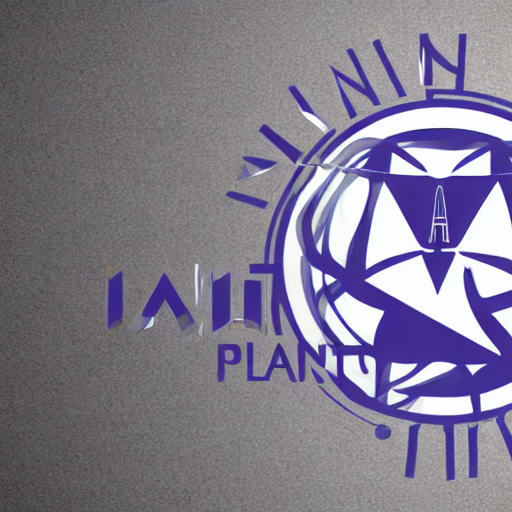

In [13]:
prompt = "logo for AI Planet"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can do either save it such as:
image.save(f"logo.png")

# or if you're in a google colab you can directly display it with 
image

  0%|          | 0/16 [00:00<?, ?it/s]

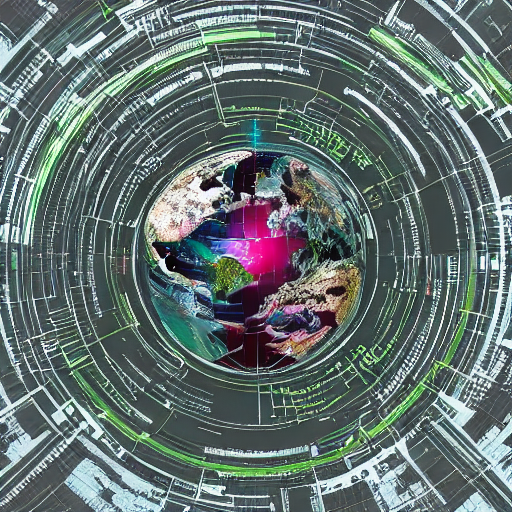

In [6]:
import torch

generator = torch.Generator("cuda").manual_seed(1024)

image = pipe(prompt, num_inference_steps=15, generator=generator).images[0]

image

  0%|          | 0/16 [00:00<?, ?it/s]

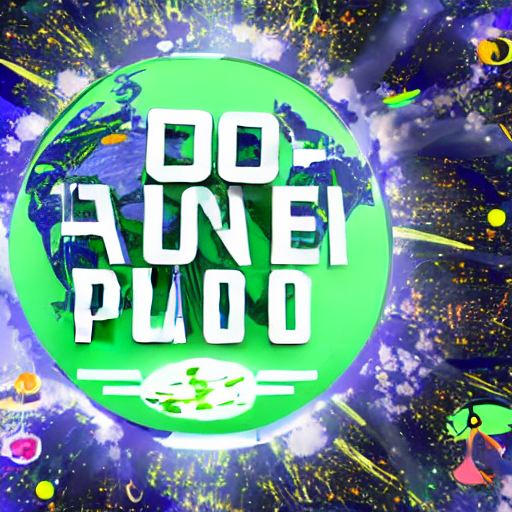

In [9]:
import torch

generator = torch.Generator("cuda")

image = pipe(prompt, num_inference_steps=15, generator=generator).images[0]

image

  0%|          | 0/51 [00:00<?, ?it/s]

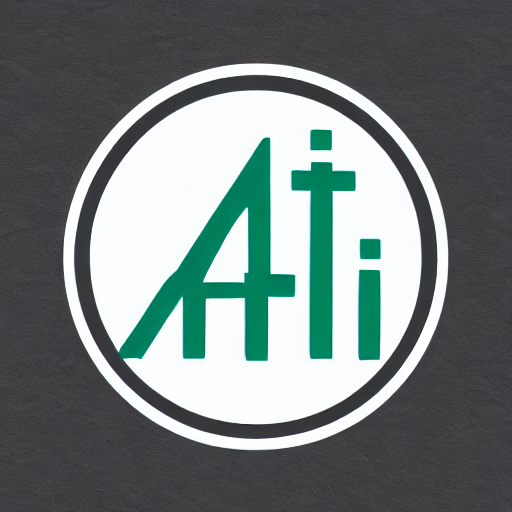

In [14]:
import torch

generator = torch.Generator("cuda")

image = pipe(prompt, num_inference_steps=50, generator=generator).images[0]

image